In [1]:
from __future__ import division
import lightgbm as gbm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score
import xgboost as xgb

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

/Users/alpersarikaya/venv/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
#train= pd.read_csv('../dataset/training.csv',header=None) #82000
data = pd.read_csv('testing.csv',header=None) #175000

In [3]:
data_y = data[43]
data_x = data.drop([0,43,44],axis=1)

In [4]:
x_tr,x_ts,y_tr,y_ts = train_test_split(data_x,data_y,test_size=0.3,random_state=42,stratify=data_y)

In [5]:
#FULL_SET
lgb_train = gbm.Dataset(x_tr,y_tr,feature_name=["dur","proto","service","state","spkts","dpkts","sbytes","dbytes","rate",
                                                "sttl","dttl","sload","dload","sloss","dloss","sinpkt","dinpkt","sjit","djit",
                                                "swin","stcpb","dtcpb","dwin","tcprtt","synack","ackdat","smean","dmean",
                                                "trans_depth","response_body_len","ct_srv_src","ct_state_ttl","ct_dst_ltm",
                                                "ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","is_ftp_login",
                                                "ct_ftp_cmd","ct_flw_http_mthd","ct_src_ltm","ct_srv_dst","is_sm_ips_ports"],
                                                categorical_feature=["proto","state","service","is_sm_ips_ports",
                                                                     "is_ftp_login"])
lgb_eval = gbm.Dataset(x_ts,y_ts,reference=lgb_train)

In [6]:
params = {
    'task': 'train', 
    'boosting_type': 'dart',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class':10,
    'max_depth' :8,
    'learning_rate': 0.1,
    'tree_learner': 'voting',
    'max_bin': 1000,
}

In [7]:
from time import time
evals={}
start = time()
clf = gbm.train(params,lgb_train,num_boost_round=50,valid_sets=lgb_eval,evals_result=evals)
print("Training %.2f seconds:" % ((time() - start)))

/Users/alpersarikaya/venv/lib/python3.6/site-packages/lightgbm/basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/alpersarikaya/venv/lib/python3.6/site-packages/lightgbm/basic.py:1190: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['is_ftp_login', 'is_sm_ips_ports', 'proto', 'service', 'state']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/alpersarikaya/venv/lib/python3.6/site-packages/lightgbm/basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's multi_logloss: 1.54791
[2]	valid_0's multi_logloss: 1.4054
[3]	valid_0's multi_logloss: 1.29236
[4]	valid_0's multi_logloss: 1.20059
[5]	valid_0's multi_logloss: 1.12256
[6]	valid_0's multi_logloss: 1.06043
[7]	valid_0's multi_logloss: 1.00035
[8]	valid_0's multi_logloss: 1.02772
[9]	valid_0's multi_logloss: 0.974669
[10]	valid_0's multi_logloss: 0.923371
[11]	valid_0's multi_logloss: 0.88276
[12]	valid_0's multi_logloss: 0.896852
[13]	valid_0's multi_logloss: 0.859138
[14]	valid_0's multi_logloss: 0.822573
[15]	valid_0's multi_logloss: 0.79023
[16]	valid_0's multi_logloss: 0.759113
[17]	valid_0's multi_logloss: 0.734963
[18]	valid_0's multi_logloss: 0.711192
[19]	valid_0's multi_logloss: 0.695094
[20]	valid_0's multi_logloss: 0.673122
[21]	valid_0's multi_logloss: 0.681052
[22]	valid_0's multi_logloss: 0.662615
[23]	valid_0's multi_logloss: 0.645603
[24]	valid_0's multi_logloss: 0.633699
[25]	valid_0's multi_logloss: 0.624901
[26]	valid_0's multi_logloss: 0.613393
[27]	v

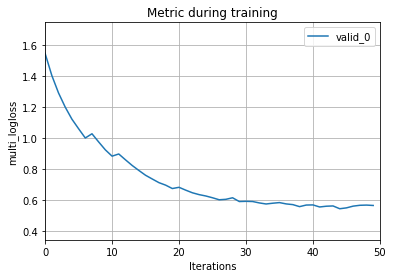

In [8]:
%matplotlib inline
gbm.plot_metric(evals)

In [9]:
y_pred = clf.predict(x_ts,num_iteration=clf.best_iteration)

In [10]:
import numpy as np
predictions = []
for x in y_pred:
    predictions.append(np.argmax(x))

In [11]:
print (accuracy_score(y_ts,predictions))
print (confusion_matrix(y_ts,predictions))

0.8225576488033002
[[15279    16     0     5   171  1289     0    10    10    20]
 [   62    93    15     0   429     1     0     0     0     0]
 [    6     6    63     2   435     6     0     4     1     1]
 [   28     3     0   160  3387    39     3    15    32    12]
 [  114     5     3    45  9444   168    12   129    42    56]
 [  952     7     0     4   535  3905     2     7    25    18]
 [    3     1     1    13   177    19 11776     2     2     6]
 [    9     0     0     8   793    11     0  2320     1     6]
 [    7     0     0     3    62    38     2    11   215     2]
 [    1     0     0     0    20     4     0     0     0    14]]


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Analysis', 'Backdoor','DoS','Exploit','Fuzzers','Generic','Recon',
                'Shell','Worms']
print(classification_report(y_ts,predictions,target_names=target_names))

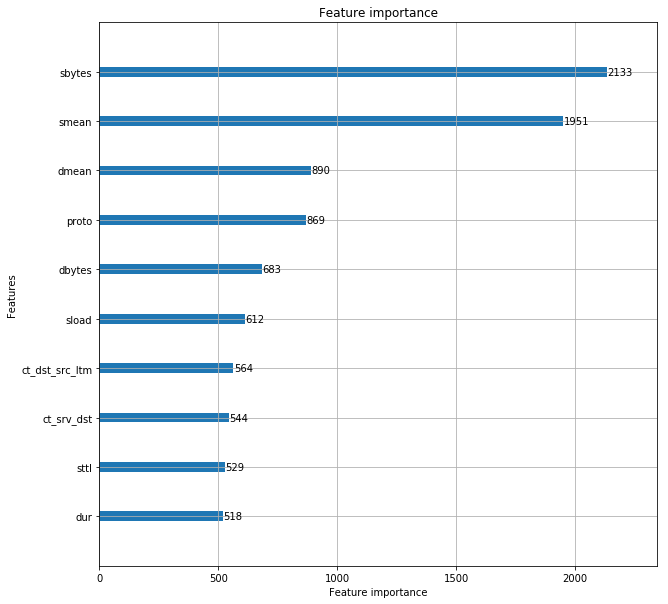

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
#gbm.plot_metric(evals)
gbm.plot_importance(clf,figsize=(10,10),max_num_features=10)

In [ ]:
from time import time
from sklearn.ensemble import RandomForestClassifier
start = time()
clf = RandomForestClassifier(max_depth=8,random_state=42,class_weight='balanced')
clf.fit(x_tr,y_tr)
print("Training %.2f seconds:" % ((time() - start)))

In [ ]:
clf_pred = clf.predict(x_ts)
print (accuracy_score(y_ts,clf_pred))
print (confusion_matrix(y_ts,clf_pred))

In [ ]:
xg_train = xgb.DMatrix(x_tr, label=y_tr)
xg_test = xgb.DMatrix(x_ts, label=y_ts)

param = {
        'max_depth':8, 
         'eta':0.1,
         'num_class':10, 
         'objective':'multi:softmax',
        'booster':'dart',
        'eval_metric':'mlogloss'}

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 50
start = time()
bst = xgb.train(param, xg_train, num_round, watchlist,)
print("Training %.2f seconds:" % ((time() - start)))
# make prediction
preds = bst.predict(xg_test)

In [ ]:
print (accuracy_score(y_ts,preds))
print (confusion_matrix(y_ts,preds))

In [ ]:
#ACCORDING_TO_HMC
y_tr = train[43]
y_ts = test[43]
x_tr = train.drop([0,1,2,5,6,9,13,16,17,18,19,20,21,22,23,24,25,26,
                   29,32,33,39,40,42,43,44],axis=1)
x_ts = test.drop([0,1,2,5,6,9,13,16,17,18,19,20,21,22,23,24,25,26,
                   29,32,33,39,40,42,43,44],axis=1)

In [ ]:
#ACCORDING_TO_HMC
lgb_train = gbm.Dataset(x_tr,y_tr,feature_name=['service','state', 'sbytes', 'dbytes', 'sttl', 'dttl','sload','sloss',
                                                'dloss','smean','dmean','response_body_len','ct_srv_src','ct_srv_src',
                                                'ct_src_dport_ltm', 'ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
                                                'ct_srv_dst'], categorical_feature=['service','state','sttl', 'dttl',
                                                'is_ftp_login','ct_ftp_cmd'])
lgb_eval = gbm.Dataset(x_ts,y_ts,reference=lgb_train)

In [ ]:
#ACCORDING_TO_DART_RESULT
y_tr = train[43]
y_ts = test[43]
x_tr = train.drop([0,4,5,6,9,10,11,14,15,16,17,18,19,20,23,24,26,29,30,32,33,34,35,37,38,39,42,43,44],axis=1)
x_ts = test.drop([0,4,5,6,9,10,11,14,15,16,17,18,19,20,23,24,26,29,30,32,33,34,35,37,38,39,42,43,44],axis=1)

In [ ]:
#ACCORDING_TO_DART_RESULT
lgb_train = gbm.Dataset(x_tr,y_tr)
lgb_eval = gbm.Dataset(x_ts,y_ts,reference=lgb_train)

In [ ]:
#FULL_SET
y_tr = train[43]
y_ts = test[43]
x_tr = train.drop([0,43,44],axis=1)
x_ts = test.drop([0,43,44],axis=1)